In [946]:
import torch
import forward_map
import forward_m_new
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch import sqrt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display


In [947]:
GPS_FREQ = 1.57542e9
radius = 2.0
n_ant=5
#radius_tensor=torch.tensor(radius)
#min_spacing = 0.25
#min_spacing_tensor = torch.tensor(min_spacing, requires_grad=True)

In [948]:
### Create the fov object once. It should NOT be created each time the array is evaluated
fov = forward_map.SquareFoV(res_arcmin=60,
                theta = 0.0, phi=0.0,
                width_rad=np.radians(140))

## Generate some random antenna positions

#x = (2*radius*torch.rand(size=(n_ant,)) - radius)
#y = (2*radius*torch.rand(size=(n_ant,)) - radius)
#z = (torch.zeros_like(x))

In [949]:
def get_uvw(x,y,z):

    num_ant = x.shape[0]
    
    uvw = []
    indices = []
    for i in range(num_ant):
        for j in range(num_ant):
            if (i != j):
                u = x[i] - x[j]
                v = y[i] - y[j]
                w = z[i] - z[j]
                
                uvw.append([u,v,w])
                indices.append([i,j])
    return uvw, indices

In [950]:
def Ratio(a,b):
    c=torch.sum(torch.abs(a))
    d=torch.sum(torch.abs(b))
    ratio = d/c
    return ratio

In [951]:
def mask(x):
    cy = x//2
    cx = x//2 
    center_position=[cx,cy]
        
    mask = torch.zeros((x, x), dtype=torch.complex64, requires_grad=True )
    y, x = torch.meshgrid(torch.arange(x), torch.arange(x))
    mask = (x - cx)**2 + (y - cy)**2 <= 1**2

    return mask

In [952]:
Mask=mask(280)

In [953]:
image.size()

torch.Size([280, 280])

In [954]:
fov = forward_map.SquareFoV(res_arcmin=60,
                theta = 0.0, phi=0.0,
                width_rad=np.radians(140))


x = (2*radius*torch.rand(size=(n_ant,)) - radius)
x.requires_grad=True
y = (2*radius*torch.rand(size=(n_ant,)) - radius)
y.requires_grad=True
z = (torch.zeros_like(x))
z.requires_grad=True


optimizer = optim.RMSprop([x,y,z], lr=0.1)

steps = 201
#min_spacing = 0.25
#min_spacing_tensor = torch.tensor(min_spacing, requires_grad=True)

loss_history = []

# Optimization loop
for step in range(steps):

    ###dist_penalty
    #penalty = forward_map.get_penalty(x,y,z, min_spacing_tensor)

    ###img_quality_penalty
    image=forward_m_new.point_spread_function(x,y,z,fov)  
     
    #image_te = image.clone().detach().requires_grad_(True)

    inside_mask_im=image*Mask
    #inside_mask_im_t = inside_mask_im.clone().detach().requires_grad_(True)
    
    ratio=Ratio(image, inside_mask_im)
    #ratio_t = ratio.clone().detach().requires_grad_(True)
    

   #loss_function
    loss = (ratio)

    # Zero gradients
    optimizer.zero_grad()
    
    # Compute gradients
    #loss.backward(retain_graph=True)
    
    # Update parameters
    optimizer.step()

    loss_history.append(loss.item())

    if step % 100 == 0:
        print(f'Step {step}: loss_history = {loss.item()}') # Prints a value for loss function once every hundred iterations

Step 0: loss_history = 0.00036488851585085173
Step 100: loss_history = 0.00036488851585085173
Step 200: loss_history = 0.00036488851585085173


In [955]:
type(ratio_t)

torch.Tensor

In [956]:
mage=forward_m_new.point_spread_function(x,y,z,fov)  

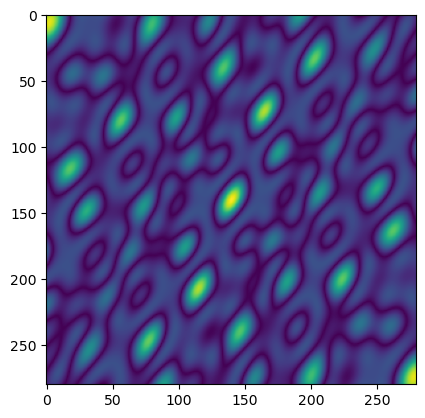

In [957]:

plt.imshow(mage)